## Principal Component Analysis

The goal of PCA is to reduce the dimensionality of the feature vectors while minizming information loss as much as possible. PCA is very helpful for simplifying data as analyzing data of multiple dimensions can become very complex. When dealing with such data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter plot.

The steps in PCA are:
1. Standardize the data - center and scale.

To center the data, we average each row by replacing the value $x$ by 
$$x - \text{mean}$$
To ensure that PCA is not selecting wrong directions in describing data variation, we also divide by the standard deviation. That is, we scale the data in each variable by finding the *$z$-scores*:

$$
z = \frac{x - \text{mean}}{\text{standard devation}}
$$

Finally, we form the $m\times n$ matrix $A$. 


2. Compute the covariance or correlation matrix.
$$
S = \frac{1}{n-1}AA^T
$$

3. . Find the eigenvalues and the orthonormal eigenvectors of $S$.

$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$
4. **Find the principal components.**
We arrange the eigenvalues found in the previous step in the decreasing order. The first principal component $PC_1$ is in the direction of the 1st eigenvector, the second principal component $PC_2$ is in the direction of the 2nd eigenvector, etc. 
5. **Reduce the dimension of the data.**
We project data points (i.e., columns of $A$) onto the selected principal components (i.e., several eigenvectors of $S$). 


---

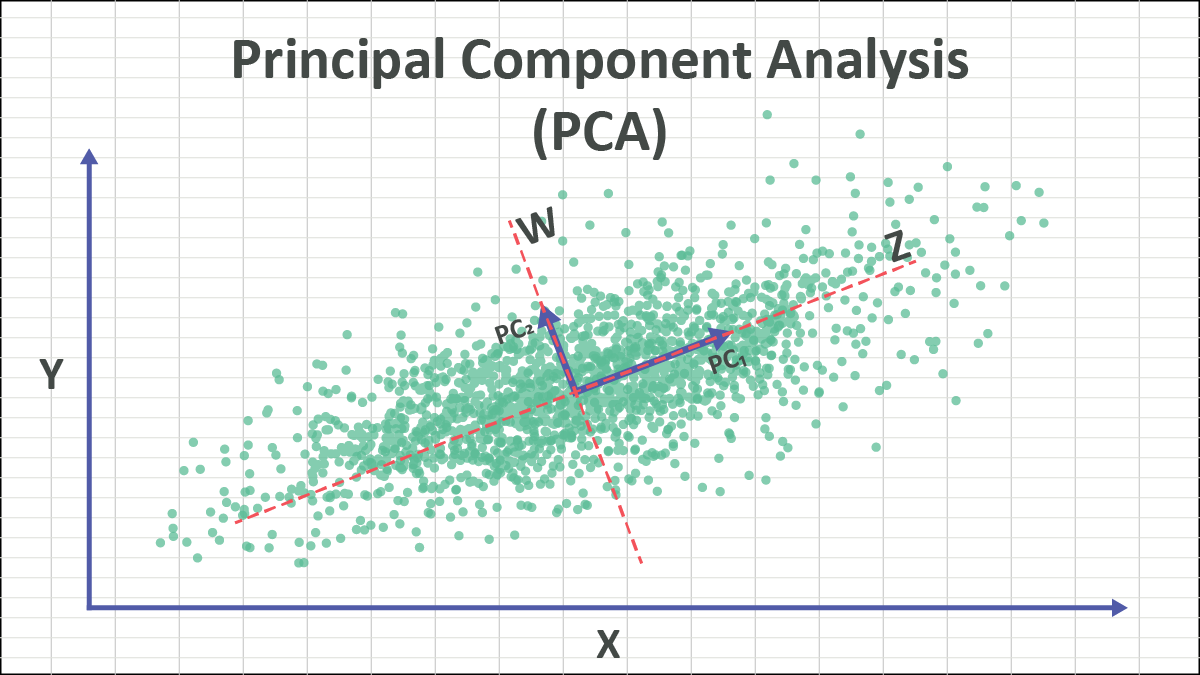

In this notebook, I will be applying PCA onto a breast cancer dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
#load data
df = pd.read_csv("Datasets/breast.csv")
df.head()
df = df.dropna(axis=1, how='all') #drop columns that are fully empty


In [ ]:
X = df.drop('diagnosis', axis=1) 

y = df['diagnosis']
y_numeric = y.map({'M': 0, 'B': 1})  # turn target variable into numeric arrays


#scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # reduce for visualization
X_pca = pca.fit_transform(X_scaled)

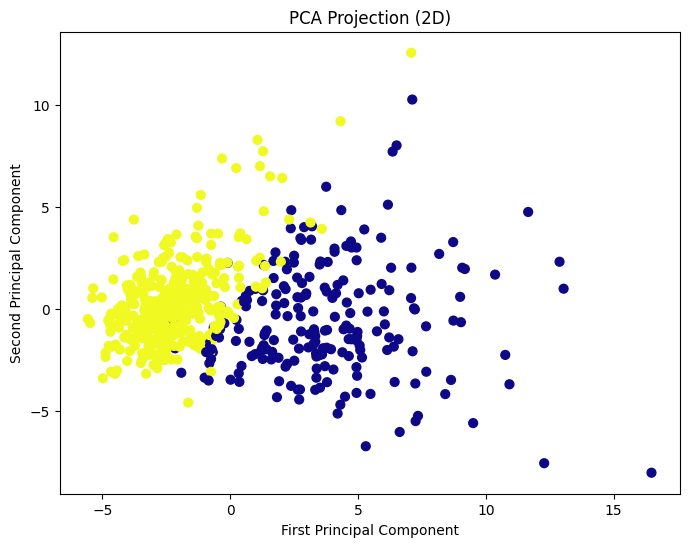

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_numeric, cmap='plasma', s=40)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Projection (2D)")
plt.show()


## Analyzing the result
First Principal Component is the direction (vector) in the original feature space along which the data varies the most.
Second Principal Component is the direction of the second-most variance, and it's orthogonal (perpendicular) to PC1.

With this type of powerful dimension reduction, it might not be easy to conceptually understand what each of the Principal Components represent.

To simplify:

The First Principal Component combines multiple features from the dataset (like radius, texture, perimeter, etc.) into a single value, in the way that best captures the differences across patients.

The Second Principal Component is the second best combination of these features, and it shows additional variation that was not captured by PC1.

PC1 and PC2 form a 2D coordinate system that preserves as much of the original structure as possible while making the data easier to visualize. Each point on the plot represents a patient’s tumor, positioned by how they score on these two new, combined dimensions.

--
Next, let's do an analysis on how well the data is captured by our Principal Components by using explained variance ratios.

pca.explained_variance_ratio_ = [0.42864701 0.18376792]
per_var = [42.86 18.38] 



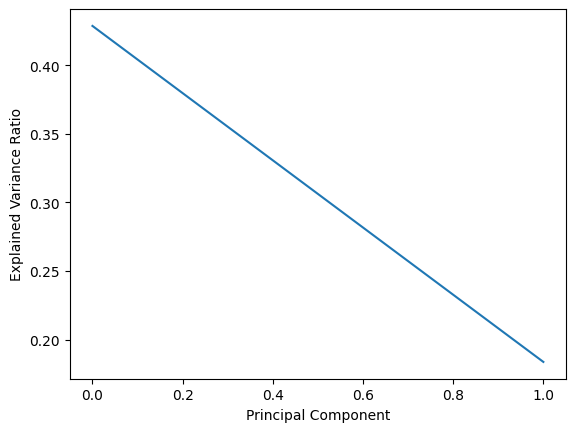

In [ ]:
#proportion of total variance explained by each principal component
print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

each_var = np.round(pca.explained_variance_ratio_*100,2)
print(f"per_var = {each_var} \n")

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel("Explained Variance Ratio")
plt.show()

The first two principal components explain a combined **61.24%** of the total variance in the dataset:

- **PC1** accounts for **42.86%**
- **PC2** accounts for **18.38%**

This shows that the 2d PCA plot captures over half (~43% + ~18%) of the original data's structure, making it very useful for visualization.

It is important to note that because only the first two components were used, nearly **39% of the total variance** was not visualized. 
Some class-separating information could be lost in this projection. And since PCA captures the linear relationships between features, it might miss complex, nonlinear relationships that exist between the variables in the original data.
